In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\002CL0744\\Documents\\NLP-NaturalLanguageProcessing\\Scikit_learn\\smsspamcollection.tsv", sep='\t')

In [3]:
df.head() #first 5 rows

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum() #sum of null values in the file

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df) #length of file

5572

In [9]:
df['label'].unique #unique values in label column

<bound method Series.unique of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>

In [13]:
df['label'].value_counts() #count of each unique value

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
import matplotlib.pyplot as plt 

C:\Users\002CL0744\AppData\Local\Temp\ipykernel_30512\3274588216.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('ham','spam')


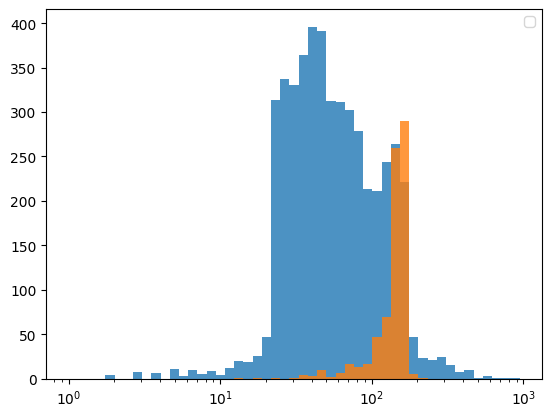

In [31]:
#visualization with length
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha = 0.8)
plt.legend('ham','spam')
plt.show()

C:\Users\002CL0744\AppData\Local\Temp\ipykernel_30512\3174940291.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('ham','spam')


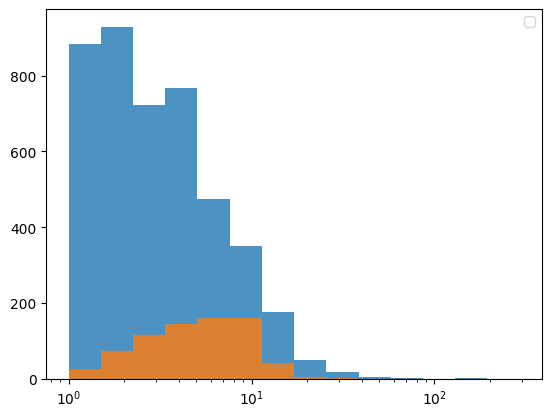

In [32]:
#visualization with punct 
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha = 0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha = 0.8)
plt.legend('ham','spam')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# X feature data
X = df[['length', 'punct']]

# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(3900, 2)

In [20]:
X_test.shape

(1672, 2)

In [22]:
y_test  #random index numbers

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [23]:
y_train.shape

(3900,)

In [24]:
from sklearn.linear_model import LogisticRegression

In [29]:
# creating instance of the model
lr_model = LogisticRegression(solver='lbfgs')

In [30]:
lr_model.fit(X_train, y_train)

LogisticRegression()